In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)

In [3]:
df_pipkmks = tools.get_dataframe('pipkmks', 'spring', 'data')
df_pimkpks = tools.get_dataframe('pimkpks', 'spring', 'data')

In [4]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS).Filter(kcuts.F1_SIGNAL_REGION_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS).Filter(kcuts.F1_SIGNAL_REGION_PIMKPKS)

In [5]:
df_pipkmks = df_pipkmks.Define('km_p', 'Numba::get_p(km_px, km_py, km_pz)').Define('km_theta', 'Numba::get_theta(km_px, km_py, km_pz)').Define('km_phi', 'Numba::get_phi(km_px, km_py)')
df_pipkmks = df_pipkmks.Define('pip1_p', 'Numba::get_p(pip1_px, pip1_py, pip1_pz)').Define('pip1_theta', 'Numba::get_theta(pip1_px, pip1_py, pip1_pz)').Define('pip1_phi', 'Numba::get_phi(pip1_px, pip1_py)')
df_pipkmks = df_pipkmks.Define('pip2_p', 'Numba::get_p(pip2_px, pip2_py, pip2_pz)').Define('pip2_theta', 'Numba::get_theta(pip2_px, pip2_py, pip2_pz)').Define('pip2_phi', 'Numba::get_phi(pip2_px, pip2_py)')
df_pipkmks = df_pipkmks.Define('pim_p', 'Numba::get_p(pim_px, pim_py, pim_pz)').Define('pim_theta', 'Numba::get_theta(pim_px, pim_py, pim_pz)').Define('pim_phi', 'Numba::get_phi(pim_px, pim_py)')
df_pipkmks = df_pipkmks.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')

df_pimkpks = df_pimkpks.Define('kp_p', 'Numba::get_p(kp_px, kp_py, kp_pz)').Define('kp_theta', 'Numba::get_theta(kp_px, kp_py, kp_pz)').Define('kp_phi', 'Numba::get_phi(kp_px, kp_py)')
df_pimkpks = df_pimkpks.Define('pim1_p', 'Numba::get_p(pim1_px, pim1_py, pim1_pz)').Define('pim1_theta', 'Numba::get_theta(pim1_px, pim1_py, pim1_pz)').Define('pim1_phi', 'Numba::get_phi(pim1_px, pim1_py)')
df_pimkpks = df_pimkpks.Define('pim2_p', 'Numba::get_p(pim2_px, pim2_py, pim2_pz)').Define('pim2_theta', 'Numba::get_theta(pim2_px, pim2_py, pim2_pz)').Define('pim2_phi', 'Numba::get_phi(pim2_px, pim2_py)')
df_pimkpks = df_pimkpks.Define('pip_p', 'Numba::get_p(pip_px, pip_py, pip_pz)').Define('pip_theta', 'Numba::get_theta(pip_px, pip_py, pip_pz)').Define('pip_phi', 'Numba::get_phi(pip_px, pip_py)')
df_pimkpks = df_pimkpks.Define('ks_p', 'Numba::get_p(ks_px, ks_py, ks_pz)').Define('ks_theta', 'Numba::get_theta(ks_px, ks_py, ks_pz)').Define('ks_phi', 'Numba::get_phi(ks_px, ks_py)')

In [14]:
km_hists = []
kp_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    km_hists.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'km_theta_vs_p_t={t}', 'K^{-} #Theta vs p for ' + t_range_string, 80, 0, 8, 20, 0, 20), 'km_p', 'km_theta'))
    kp_hists.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'kp_theta_vs_p_t={t}', 'K^{+} #Theta vs p for ' + t_range_string, 80, 0, 8, 20, 0, 20), 'kp_p', 'kp_theta'))


In [15]:
c = ROOT.TCanvas('c', 'c', 1200, 800)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


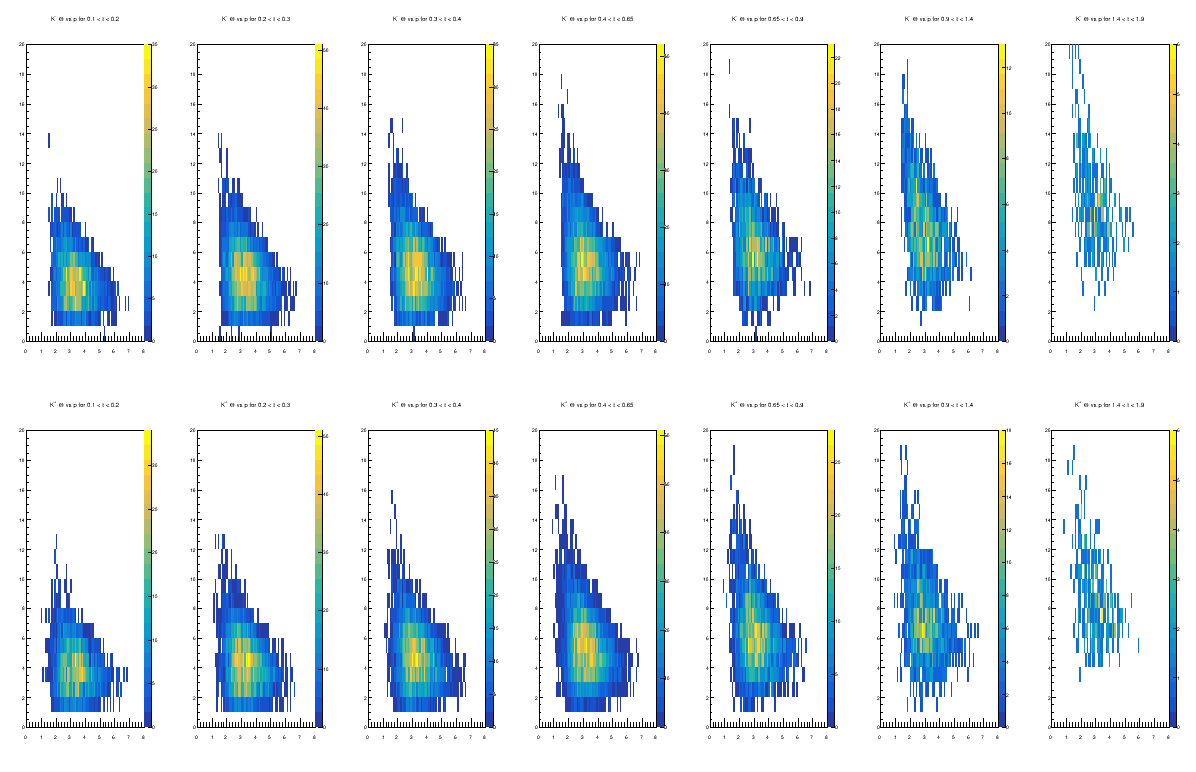

In [16]:
c.Divide(len(constants.ALLOWED_T_BINS), 2)
for i, (hist_km, hist_kp) in enumerate(zip(km_hists, kp_hists)):
    hist_km.SetLineColor(ROOT.kBlue)
    hist_kp.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_km.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_kp.Draw('colz')
c.Draw()




In [17]:
# bad code but im in a hurry 
pip1_hists = []
pim1_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip1_hists.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pip1_theta_vs_p_t={t}', '#pi^{+} #Theta vs p for ' + t_range_string, 80, 0, 8, 20, 0, 20,), 'pip1_p', 'pip1_theta'))
    pim1_hists.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pim1_theta_vs_p_t={t}', '#pi^{-} #Theta vs p for ' + t_range_string, 80, 0, 8, 20, 0, 20), 'pim1_p', 'pim1_theta'))

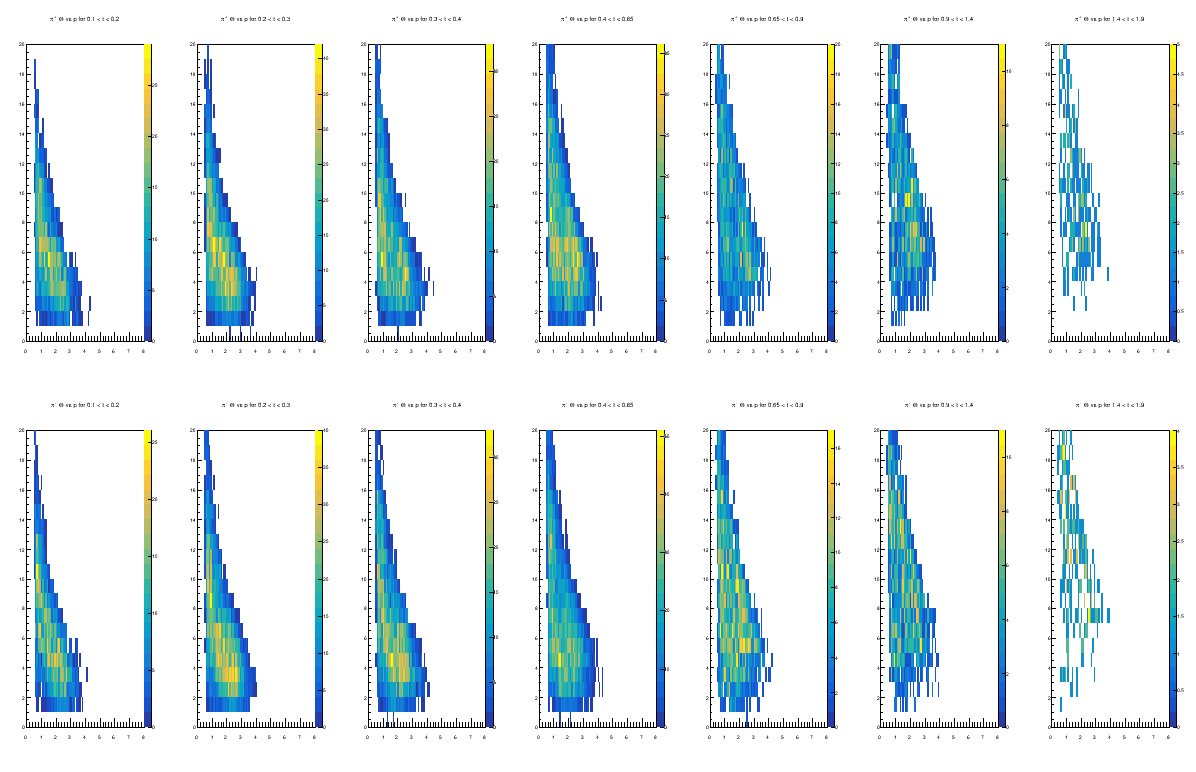

In [18]:
for i, (hist_pip1, hist_pim1) in enumerate(zip(pip1_hists, pim1_hists)):
    hist_pip1.SetLineColor(ROOT.kBlue)
    hist_pim1.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_pip1.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_pim1.Draw('colz')
c.Draw()

In [22]:
pip_ks_hists = []
pim_ks_hists = []
for t in constants.ALLOWED_T_BINS:
    t_range_string = f'{constants.T_CUT_DICT[t][0]} < t < {constants.T_CUT_DICT[t][1]}'
    pip_ks_hists.append(df_pipkmks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pipkmks_ks_theta_vs_p_t={t}', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{+}K^{-}', 80, 0, 8, 20, 0, 20,), 'ks_p', 'ks_theta'))
    pim_ks_hists.append(df_pimkpks.Filter(kcuts.SELECT_T_BIN.format(t)).Histo2D((f'pimkpks_ks_theta_vs_p_t={t}', 'K_{s} #Theta vs p for ' + t_range_string + 'for channel #pi{-}K^{+}', 80, 0, 8, 20, 0, 20), 'ks_p', 'ks_theta'))

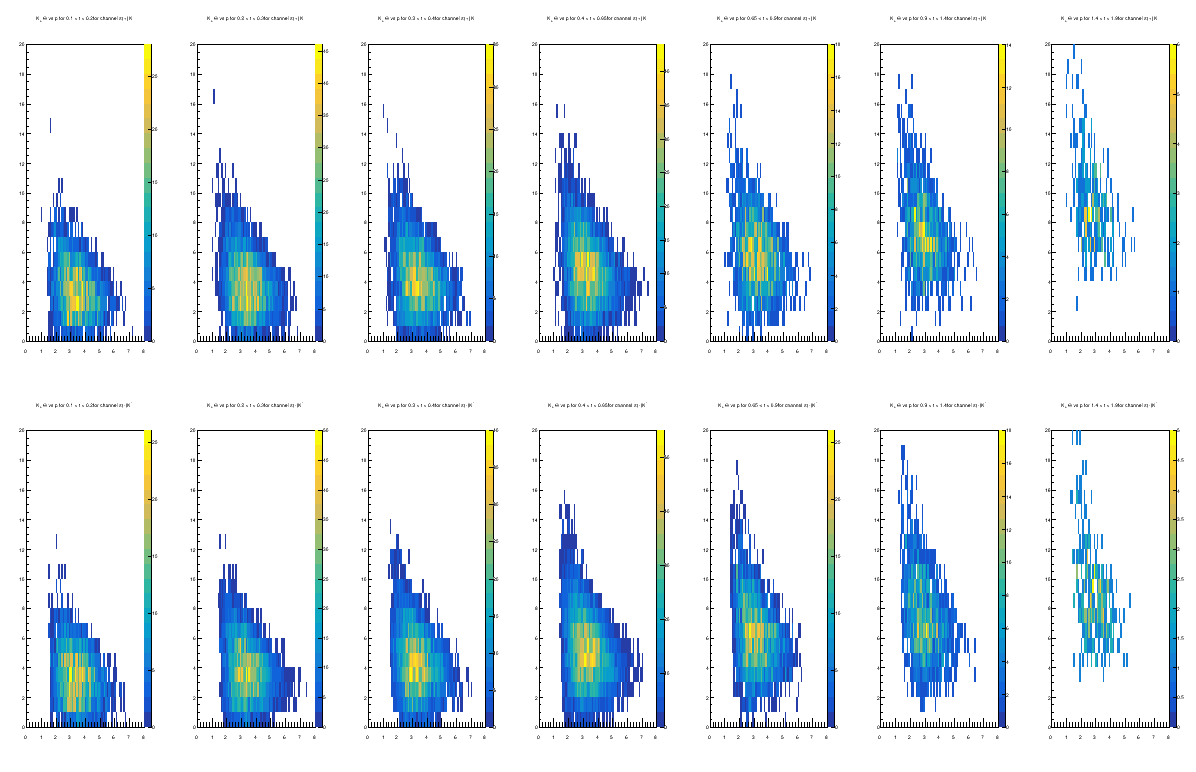

In [23]:
for i, (hist_pip_ks, hist_pim_ks) in enumerate(zip(pip_ks_hists, pim_ks_hists)):
    hist_pip_ks.SetLineColor(ROOT.kBlue)
    hist_pim_ks.SetLineColor(ROOT.kRed)
    c.cd(i +1)
    hist_pip_ks.Draw('colz')
    c.cd(i + 1 + len(constants.ALLOWED_T_BINS))
    hist_pim_ks.Draw('colz')
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


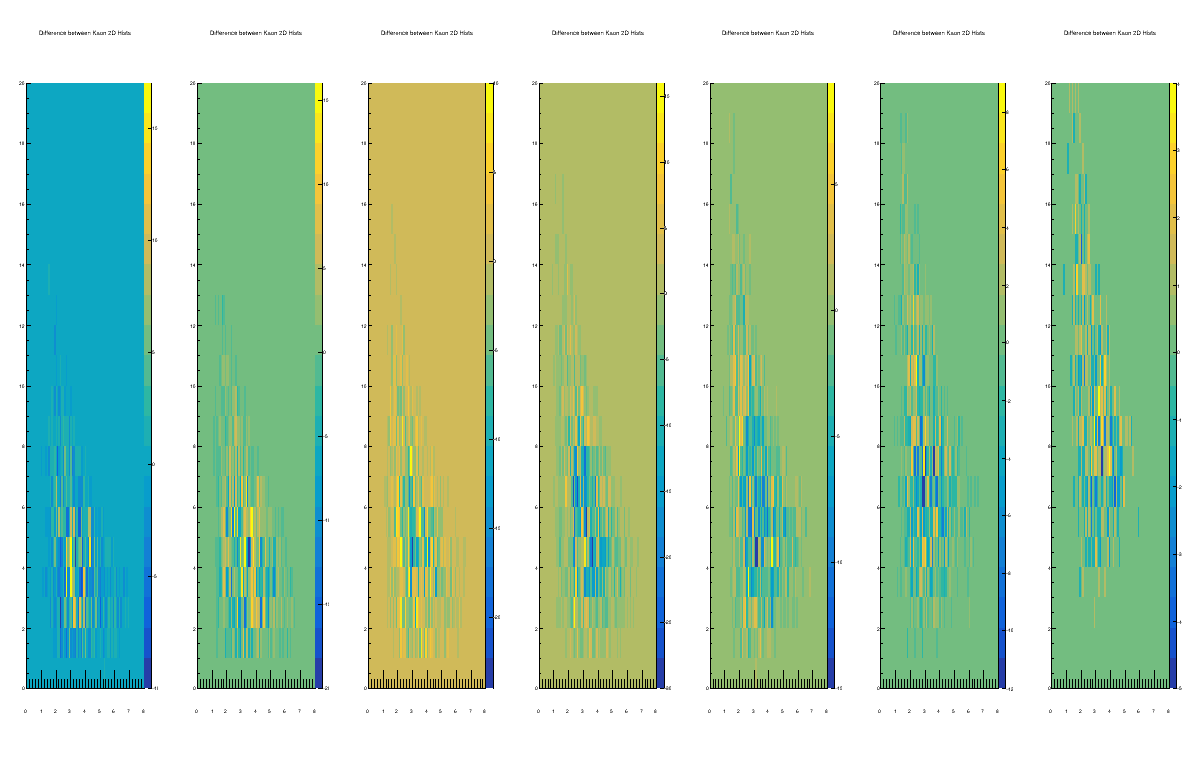

In [24]:
c1 = ROOT.TCanvas('c1', 'c1', 1200, 800)
c1.Divide(7, 1)
hist_diffs = []
for i, (hist_km, hist_kp) in enumerate(zip(km_hists, kp_hists)):
    c1.cd(i+1)
    hist_diff = hist_km.Clone(f'kmkp_diff_t={constants.ALLOWED_T_BINS[i]}')
    hist_diff.Add(hist_kp.GetPtr(), -1)
    hist_diff.SetTitle('Difference between Kaon 2D Hists')
    hist_diffs.append(hist_diff)
    hist_diffs[i].Draw('colz')
c1.Draw()